In [1]:
import numpy as np


In [2]:
CONTEXT_SIZE = 2


In [3]:
text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Duis hendrerit ipsum leo, pharetra imperdiet ante auctor eget. Duis fringilla neque a nisi cursus, a consectetur sem vulputate. Nam porttitor gravida nibh, id fringilla leo fringilla non. Mauris mauris odio, rutrum a neque id, accumsan molestie sem. Mauris quis risus in mi tristique efficitur. Nulla feugiat ante magna, vel dignissim justo venenatis vitae. Curabitur felis nisl, auctor at dolor vitae, convallis semper ante. Sed efficitur, felis vel porta lacinia, urna ex pharetra erat, ut tempus nisl elit eu lorem. Sed risus libero, malesuada at mauris finibus, eleifend volutpat lacus. Donec vel nibh leo. Aliquam mattis odio ut convallis fermentum. Nam volutpat dolor dui, et malesuada tellus varius at. Donec pretium enim a nisi egestas, non iaculis purus laoreet. Sed nibh risus, congue vel velit id, varius dapibus lorem. Etiam tincidunt, justo ut pellentesque ultrices, neque odio elementum elit, nec semper quam lacus quis dolor. Suspendisse faucibus ipsum quis metus suscipit porta. Proin vitae vehicula eros, in imperdiet lacus. Ut sed pulvinar mauris.".split()


In [4]:
skipgrams = []
for i in range(CONTEXT_SIZE, len(text) - CONTEXT_SIZE):
    array = [text[j
            ] for j in np.arange(i-CONTEXT_SIZE,i+CONTEXT_SIZE+1) if j != i]
    skipgrams.append((text[i],array))

In [5]:
vocab = set(text)
VOCAB_SIZE = len(vocab)
print(f"size of vocabulary = {VOCAB_SIZE}")
      

size of vocabulary = 125


In [6]:
#!pip install -qU gensim
from gensim.models.word2vec import Word2Vec

In [7]:
model = Word2Vec([text],
                sg=1,
                vector_size=10,
                min_count=0,
                window=2,
                workers=2,
                seed=0)

In [8]:
print(f"shape of w_embed: {model.wv.vectors.shape}")

shape of w_embed: (125, 10)


In [9]:
model.train([text],total_examples=model.corpus_count,epochs=10)

(851, 1710)

In [10]:
print(f'Word embedding = {model.wv[0]}')

Word embedding = [ 0.07267274  0.03012412  0.00201254 -0.04575691 -0.03461642 -0.08262384
 -0.09307391 -0.09557172 -0.06241203  0.06786316]


In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
random.seed(0)

In [12]:
G = nx.erdos_renyi_graph(10, 0.3, seed=1, directed=False)

In [13]:
plt.figure(dpi=3000)
plt.axis('off')
nx.draw_networkx(G,
pos=nx.spring_layout(G,seed=0),
node_size=600,
font_size=14,
font_color='white')

In [14]:
def random_walk(start, length):
    walk = [str(start)]
    for i in range(length):
        neighbors = [node for node in G.neighbors(start)]
        next_node = np.random.choice(neighbors, 1)[0]
        walk.append(str(next_node))
        start = next_node
    return walk

In [15]:
print(random_walk(0,10))

['0', '1', '6', '5', '4', '0', '9', '4', '3', '6', '5']


In [16]:
G = nx.karate_club_graph()

In [17]:
labels = []
for node in G.nodes:
    label = G.nodes[node]['club']
    labels.append(1 if label=='Officer' else 0)

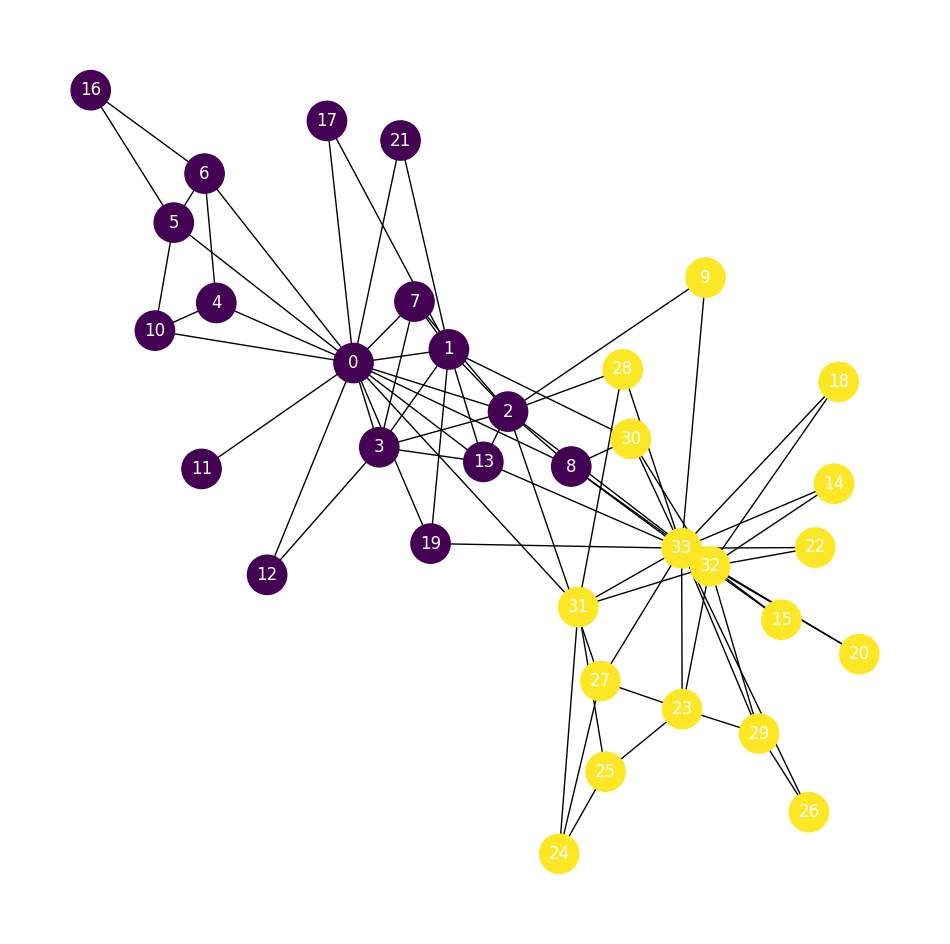

In [18]:
plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx(G, 
node_color=labels,
font_color='white',
node_size=800)

In [19]:
walks = []
for node in G.nodes:
    for _ in range(80):
        walks.append(random_walk(node,10))

In [20]:
print(walks[-1])

['33', '9', '2', '0', '8', '33', '18', '33', '14', '33', '29']


In [21]:
model = Word2Vec(walks,
hs=1,
sg=1,
vector_size=100,
window=10,
workers=2,
seed=0)

In [22]:
model.train(walks, total_examples=model.corpus_count, epochs=30, report_delay=1)

(187479, 897600)

In [23]:
for similarity in model.wv.most_similar(positive=['1']):
    print(f" {similarity}")

 ('17', 0.6805356740951538)
 ('21', 0.5911005735397339)
 ('13', 0.5539065599441528)
 ('0', 0.5460510849952698)
 ('19', 0.5261657238006592)
 ('7', 0.5214020013809204)
 ('3', 0.5176447629928589)
 ('12', 0.5133621692657471)
 ('11', 0.4818650782108307)
 ('2', 0.3797706663608551)


In [24]:
print(f"similarity between node 0 and node 4: {
    model.wv.similarity('0','4')
}")

similarity between node 0 and node 4: 0.650619387626648


In [25]:
from sklearn.manifold import TSNE

In [26]:
nodes_wv = np.array([model.wv.get_vector(str(i)) for i in range(len(model.wv))])
labels = np.array(labels)

In [27]:
tsne = TSNE(n_components=2,
learning_rate='auto',
init='pca',
random_state=0).fit_transform(nodes_wv)

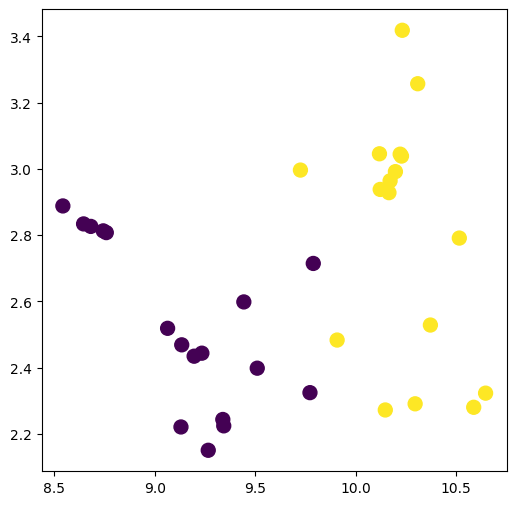

In [28]:
plt.figure(figsize=(6,6))
plt.scatter(tsne[:,0],tsne[:,1],s=100,c=labels)
plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [38]:
train_mask = list(range(0,29,2))
test_mask = list(range(1,34,2))

In [40]:
clf = RandomForestClassifier(random_state=0)
clf.fit(nodes_wv[train_mask],labels[train_mask])

RandomForestClassifier(random_state=0)

In [42]:
y_pred = clf.predict(nodes_wv[test_mask])
accuracy_score(y_pred, labels[test_mask])

1.0